# Wave velocity

Relates to exercise 10 on page 47.

@olsthoorn, 2012-12-30

The solution for the partial differential equation

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t} $$

Given the as a boundary condition $s(0, t) = A \sin(\omega t - \theta) $, met $\theta$ a constant, is

$$ s(x, t) = A e^{-a x} \sin(\omega t - ax - \theta) $$

with $\omega T = 2 \pi$ and

$$ a = \sqrt{ \frac {\omega S} {2 kD} } $$

The velocity of the wave is obtained by setting the argument of the $\sin$ function equal to zero:

$$ \omega t - a x + \theta = 0 $$

then taking the derivatie with respect to time to obtaine $ dx / dt$

$$ omega - a \frac {dx} {dt} = 0 $$

and so

$$ v = \frac {dx} {dt} = \frac \omega a $$ 

To show the effect, plot waves at different distances and compute the velocity of the wave.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

kD = 600 # m2/d
S  = 0.1 # [-]
T = 1.0 # cycle time in days
omega = (2 * np.pi) / T # 2 cycles per day
a = np.sqrt(omega * S / (2 * kD))
A = 1.0

We'll show the wave at three different times and als compute and show where it intersects with the $x$-axis.

Let's take as the solution, where $\tau$ is the delay in days that $y=0$  at $x=0$ .

$$ y = A e^{-a x} \sin (\omega (t -\tau) - a x) $$

Set $y = 0$, implying that the argument of the $\sin$ must be zero. Hence

$$ \omega (t - \tau) - a x  = 0 $$

yielding

$$ x = \frac {\omega (t - \tau)} a + n \pi$$

The points in the plot indicate the position where the wave at a particular time intersects the $x$-axis, hence where $y=0$

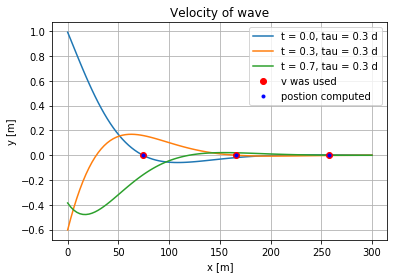

In [60]:
x = np.linspace(0, 300, 101)   # m
times = np.array([0, 0.333, 0.667]) # d
v = omega/a
tau = 0.27
n = 0

plt.title("Velocity of wave")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()

# for each curve loop over t
for t in times:
    y = A * np.exp(-a * x) * np.sin(omega * (t + tau) - a * x)    
    plt.plot(x, y, label="t = {:.1f}, tau = {:.1f} d".format(t, tau))
    
# for x positions, we can just compute for all times at once without looping
plt.plot(v * (times + tau)           , np.zeros_like(times), 'ro', label='v was used') # v was used
plt.plot((omega * (times + tau)) / a , np.zeros_like(times), 'b.', label='postion computed') # position was used
    
plt.legend()
plt.show()